In [90]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pylab
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

## Задание 1

* Используя модуль datasets библиотеки Scikit-learn, сгенерировать модельный
набор данных для задачи бинарной классификации в виде двух облаков точек: общее количество точек равно 200,
количество признаков, характеризующих объекты, равно 2. Параметр, определяющий степень рассеянности данных, установить равным 5.5.
Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.
* Вывести сгенерированные координаты точек и метки классов.

In [91]:
class BinaryClassification:

    def __init__(self, n_samples=200, n_features=2, cluster_std=5.5, random_state=1, centers=2):
        self.X, self.y = make_blobs(
            n_samples=n_samples,
            n_features=n_features,
            cluster_std=cluster_std,
            random_state=random_state,
            centers=centers
        )

    def show_classes_scatter(self):
        pylab.scatter(
            self.X[:, 0],
            self.X[:, 1],
            c=self.y ,
            cmap=ListedColormap(['green', 'blue'])
        )
        pylab.show()

binary1 = BinaryClassification()
binary1.X, binary1.y

(array([[-1.45636579e+01, -8.79652535e+00],
        [-1.65004622e+01, -7.61499840e+00],
        [-1.30639335e+01,  1.21207955e+00],
        [-3.80839830e-01,  8.16052261e+00],
        [ 9.32344429e-02, -8.49242842e-01],
        [-3.97704760e-02, -1.11348466e+01],
        [-8.88296171e-02,  9.27476627e+00],
        [-2.03000979e+01,  1.11003460e+00],
        [-5.80874858e+00,  1.12972647e+01],
        [-7.98288642e+00, -9.69859015e+00],
        [-1.09228061e+01, -4.91134044e+00],
        [-1.90766795e+01, -8.85140426e+00],
        [ 1.10795657e+00,  1.15192322e+01],
        [-1.15901982e-01,  4.00437000e+00],
        [-1.07455878e+01, -8.33833237e+00],
        [-2.53596800e+01,  6.70305993e+00],
        [-8.47696633e+00, -7.98634237e+00],
        [-1.48227609e+01, -8.72617827e+00],
        [-7.79356024e-01,  9.22541893e+00],
        [-3.86860613e+00, -7.17923021e+00],
        [-2.01485157e+00, -7.35255121e+00],
        [-1.54813214e+01, -4.54071547e+00],
        [-1.17934597e+01, -1.133

Выполнить визуализацию сгенерированных облаков.
Указание: для представления объектов разных классов точками разных цветов можно использовать объект ListedColormap (инструментарий библиотеки Matplotlib):
from matplotlib.colors import ListedColormap
colors = ListedColormap(['red', 'blue']) # список используемых цветов
После этого объект с именем colors можно использовать в качестве значения параметра cmap в pylab.scatter.

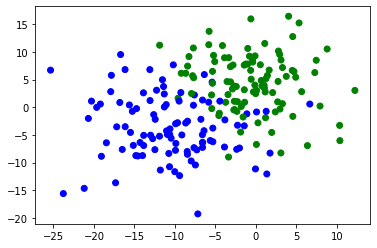

In [92]:
binary1.show_classes_scatter()

Поэкспериментировать с величиной шума: задать значения соответствующего параметра равными 4.0, 7.0 и 10.0,
вывести графики в одном ряду с заголовками, сообщающими об используемом значении параметра шума.

In [93]:
binary2 = BinaryClassification(cluster_std=4.0)
binary3 = BinaryClassification(cluster_std=7.0)
binary4 = BinaryClassification(cluster_std=10.0)

Величина шума: 4.0


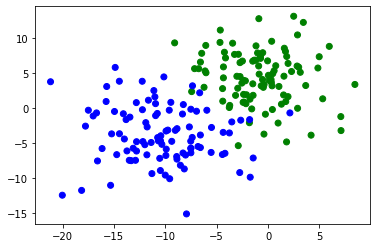

Величина шума: 7.0


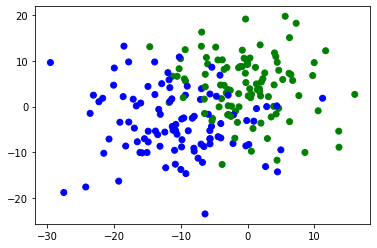

Величина шума: 10.0


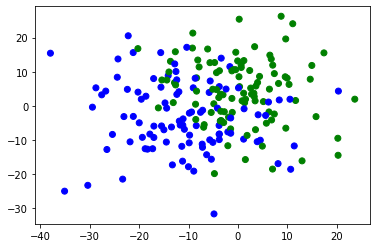

In [94]:
print(f'Величина шума: {4.0}')
binary2.show_classes_scatter()

print(f'Величина шума: {7.0}')
binary3.show_classes_scatter()

print(f'Величина шума: {10.0}')
binary4.show_classes_scatter()

## Задание 2

Выполнить разбиение набора данных, полученного в п. 1 задания 1, на
обучающую и тестовую выборки в соотношении 70/30.

In [95]:

X_train, X_test, y_train, y_test = train_test_split(binary1.X, binary1.y, test_size=0.3, random_state=0)

Создать модель линейной классификации, использующую L2-регуляризатор, и
обучить ее на обучающей выборке (значение коэффициента регуляризации
оставить по умолчанию).

In [96]:
class LinearRegressionL:

    def __init__(self, model_type, coef=1.0, loss=None):
        self.coef = coef
        self.model_type = model_type
        if model_type == 'L1':
            self.model = Lasso(alpha=coef)
        elif model_type == 'L2':
            self.model = Ridge(alpha=coef)
        elif model_type == 'RidgeClassifier':
            self.model = RidgeClassifier(alpha=coef)
        else:
            self.model = SGDClassifier(loss=loss, shuffle=False)


    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

    def fetch_accuracy_score(self, X, y):
        return self.model.score(X, y)

In [97]:
ridge = LinearRegressionL(model_type='RidgeClassifier')
ridge.fit(X_train, y_train)
y_pred_L2 = ridge.predict(X_test)
# print(regression_L2)

Получить предсказания обученной модели для объектов тестовой выборки.
Вывести массив ответов на тестовой выборке и массив предсказанных моделью значений. Оценить качество классификации
с помощью метрики accuracy; дать интерпретацию полученной оценки.

In [98]:
y_test, y_pred_L2

(array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0]))

Точность модели примерно 96%

In [99]:
accuracy_score(y_test, y_pred_L2)

0.9666666666666667

Создать несколько моделей линейной классификации, использующих L2- и L1- регуляризаторы и различные функции потерь,
используя SGDClassifier. Обучить построенные модели на обучающей выборке. Оценить качество всех полученных классификаторов.

In [100]:
regression_L1 = LinearRegressionL(model_type='L1', coef=0.001)
regression_L1.fit(X_train, y_train)
regression_L1.fetch_accuracy_score(X_test, y_test)

0.6897039879220669

In [101]:
regression_L2 = LinearRegressionL(model_type='L2', coef=0.001)
regression_L2.fit(X_train, y_train)
regression_L2.fetch_accuracy_score(X_test, y_test)

0.6897745795305712

In [102]:
# Метод опорных векторов
classifier_hinge = LinearRegressionL(model_type='SGDClassifier', loss='hinge')
classifier_hinge.fit(X_train, y_train)
classifier_hinge.fetch_accuracy_score(X_test, y_test)

0.8666666666666667

In [103]:
# Логическая регрессия
classifier_log = LinearRegressionL(model_type='SGDClassifier', loss='log')
classifier_log.fit(X_train, y_train)
classifier_log.fetch_accuracy_score(X_test, y_test)

0.95

In [104]:
# Квадратичная ошибка
classifier_squared = LinearRegressionL(model_type='SGDClassifier', loss='squared_hinge')
classifier_squared.fit(X_train, y_train)
classifier_squared.fetch_accuracy_score(X_test, y_test)

0.9833333333333333

Выбрать две лучшие (по метрике accuracy) модели из числа классификаторов,
полученных при выполнении задания 2. Используя инструментарий модуля sklearn.metrics, оценить качество этих моделей
с помощью метрик precision, recall.

In [105]:
def print_metrics(y_pred):
    print(f'precision: {precision_score(y_test, y_pred)}\n'
          f'recall: {recall_score(y_test, y_pred)}\n')

* 0% ложных срабатываний

* выявлено 90% объектов класса  +1

In [106]:
y_pred_log = classifier_log.predict(X_test)
print_metrics(y_pred_log)

precision: 1.0
recall: 0.9



* 0% ложных срабатываний

* выявлено 96% объектов класса  +1

In [107]:
y_pred_squared = classifier_squared.predict(X_test)
print_metrics(y_pred_squared)

precision: 1.0
recall: 0.9666666666666667



Получить матрицу ошибок. Используя эту матрицу, посчитать (по формулам) значения precision, recall и F–меры, сравнить
полученные значения с результатами, полученными в п. 1.

In [108]:
matrix_log = confusion_matrix(y_test, y_pred_log)
matrix_log

array([[30,  0],
       [ 3, 27]])

*precision* = TP / ( TP + FP ) = 1

*recall* = TP / ( TP + FN ) = 0.90

*F-score* = (2 * *precision* * *recall*) / (*precision* + *recall*) = 0.947

In [109]:
matrix_squared = confusion_matrix(y_test,y_pred_squared)
matrix_squared

array([[30,  0],
       [ 1, 29]])

*precision* = TP / ( TP + FP ) = 1

*recall* = TP / ( TP + FN ) = 0.967

*F-score* = (2 * *precision* * *recall*) / (*precision* + *recall*) = 0.983

* Получить для рассматриваемых моделей значения FPR и TPR (на обучающей и тестовой выборке отдельно).
Выполнить вычисления с помощью функции roc_curve и непосредственно по матрице ошибок. Сравнить результаты.
* Построить ROC-кривые (для обучающей и тестовой выборки)

FPR (ось абцисс) = FP / (FP + TN)

TPR (ось ординат) = TP / (TP + FN)

In [110]:
def calculate_roc(classifier):
    # preds
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # matrix
    matrix_train = confusion_matrix(y_train, y_train_pred)
    matrix_test = confusion_matrix(y_test, y_test_pred)

    # fpr, tpr
    tp_train, fp_train, fn_train, tn_train = fetch_params(matrix_train)
    tp_test, fp_test, fn_test, tn_test = fetch_params(matrix_test)
    fpr_train, tpr_train = fp_train/(fp_train + tn_train), tp_train/(tp_train + fn_train)
    fpr_test, tpr_test = fp_test/(fp_test + tn_test), tp_test/(tp_test + fn_test)

    #roc_curve
    fpr_train_roc, tpr_train_roc, _ = roc_curve(y_train, y_train_pred)
    fpr_test_roc, tpr_test_roc, _ = roc_curve(y_test, y_test_pred)

    print(classifier.model, '\n')
    print_roc_params('По матрице ошибок (train)', fpr_train, tpr_train)
    print_roc_params('roc_curve (train)', fpr_train_roc[1], tpr_train_roc[1])
    show_roc_plot(classifier, X_train, y_train)

    print_roc_params('По матрице ошибок (test)', fpr_test, tpr_test)
    print_roc_params('roc_curve (test)', fpr_test_roc[1], tpr_test_roc[1])
    show_roc_plot(classifier, X_test, y_test)

def print_roc_params(title, fpr, tpr):
    print(f'{title}\n')
    print(f"FPR = {fpr}\nTRP = {tpr}\n")

def fetch_params(matrix):
    return matrix[0][0], matrix[0][1], matrix[1][0] , matrix[1][1]

# (Оценки вероятности.)
def show_roc_plot(cl, x, y):
    try:
        y_pred = cl.model.predict_proba(x)[:,1]
    except Exception:
        y_pred = cl.model.decision_function(x)

    fpr, tpr, threshold = roc_curve(y, y_pred)
    # площадь под ROC-кривой
    print(f'AUC-ROC: {auc(fpr, tpr)}')
    plt.plot(fpr, tpr)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

SGDClassifier(loss='log', shuffle=False) 

По матрице ошибок (train)

FPR = 0.0625
TRP = 0.868421052631579

roc_curve (train)

FPR = 0.05714285714285714
TRP = 0.8571428571428571

AUC-ROC: 0.9495918367346938


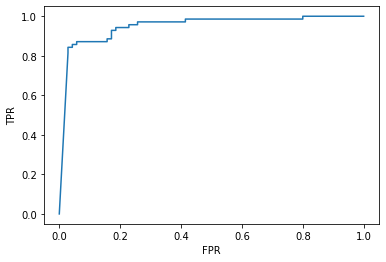

По матрице ошибок (test)

FPR = 0.0
TRP = 0.9090909090909091

roc_curve (test)

FPR = 0.0
TRP = 0.9

AUC-ROC: 0.99


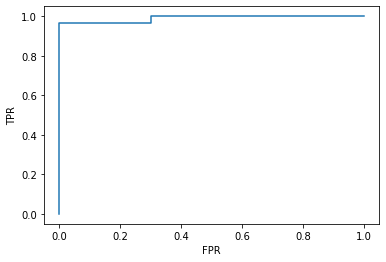

In [111]:
calculate_roc(classifier_log)

SGDClassifier(loss='squared_hinge', shuffle=False) 

По матрице ошибок (train)

FPR = 0.11267605633802817
TRP = 0.8985507246376812

roc_curve (train)

FPR = 0.11428571428571428
TRP = 0.9

AUC-ROC: 0.9591836734693877


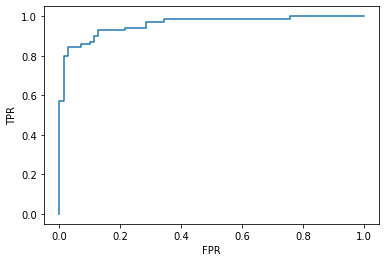

По матрице ошибок (test)

FPR = 0.0
TRP = 0.967741935483871

roc_curve (test)

FPR = 0.0
TRP = 0.9666666666666667

AUC-ROC: 0.9911111111111112


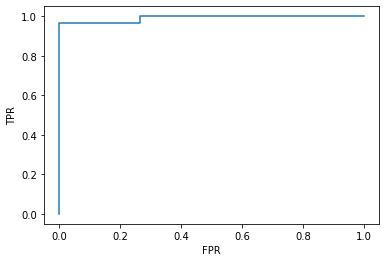

In [112]:
calculate_roc(classifier_squared)

AUC-ROC >= 0.94 => реализованные класификаторы хорошо показывают себя

## Lab 6

Выполнить оценку качества моделей линейной классификации, созданных при
выполнении задания 2 по бинарной линейной классификации (в файле 5_2_Бинарная классификация),
с помощью кросс-валидации (использовать метрику accuracy, количество блоков, равное 10).
Для каждой модели вывести массив показателей качества, итоговую оценку (среднее значение) и
среднеквадратичное отклонение. Выполнить анализ полученных результатов.

In [113]:
def print_scores(scores):
    print(f'Показатели качества: {scores}\n'
          f'accuracy = {round(scores.mean(), 3)}\n'
          f'σ = {round(scores.std(), 3)}\n\n')

blocks = 10

print(classifier_log.model)
print_scores(cross_val_score(classifier_log.model, binary1.X, binary1.y, cv=blocks))

print(classifier_squared.model)
print_scores(cross_val_score(classifier_squared.model, binary1.X, binary1.y, cv=blocks))


SGDClassifier(loss='log', shuffle=False)
Показатели качества: [0.95 0.75 0.9  0.95 0.8  1.   0.8  0.95 0.75 0.85]
accuracy = 0.87
σ = 0.087


SGDClassifier(loss='squared_hinge', shuffle=False)
Показатели качества: [0.95 0.8  0.9  0.95 0.9  1.   0.8  0.9  0.8  0.85]
accuracy = 0.885
σ = 0.067


